In [1]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 

Using TensorFlow backend.


In [2]:
# FOR REPRODUCIBILITY
np.random.seed(7)

# IMPORTING DATASET 
dataset = pd.read_csv('apple_share_price.csv', usecols=[1,2,3,4])
dataset = dataset.reindex(index = dataset.index[::-1])

In [3]:
dataset

,Open,High,Low,Close
1663,46.52,47.18,46.41,47.08
1662,47.49,47.50,46.88,47.33
1661,47.08,47.76,47.07,47.71
1660,47.82,47.89,47.56,47.68
1659,47.71,48.05,47.41,48.02
...,...,...,...,...
4,157.06,158.92,156.67,158.81
3,158.60,161.83,158.27,160.08
2,159.26,161.27,159.11,161.06
1,159.90,160.00,154.63,155.32


In [4]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

In [5]:
obs

array([   1,    2,    3, ..., 1662, 1663, 1664])

In [6]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

In [7]:
HLC_avg

1663     46.890000
1662     47.236667
1661     47.513333
1660     47.710000
1659     47.826667
           ...    
4       158.133333
3       160.060000
2       160.480000
1       156.650000
0       157.373333
Length: 1664, dtype: float64

In [8]:
close_val

,Close
1663,47.08
1662,47.33
1661,47.71
1660,47.68
1659,48.02
...,...
4,158.81
3,160.08
2,161.06
1,155.32


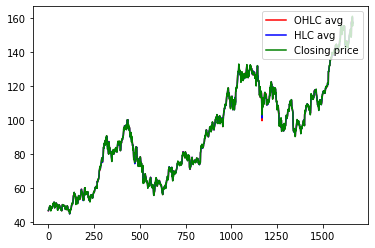

In [9]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [10]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [11]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = preprocessing.new_dataset(train_OHLC, 1)
testX, testY = preprocessing.new_dataset(test_OHLC, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [12]:
test_OHLC

array([[0.56906809],
       [0.5430997 ],
       [0.53719385],
       [0.53990794],
       [0.54670401],
       [0.55115512],
       [0.53877888],
       [0.54683429],
       [0.54637832],
       [0.5297464 ],
       [0.51066093],
       [0.513679  ],
       [0.48497481],
       [0.45933212],
       [0.45865902],
       [0.46413062],
       [0.47746222],
       [0.46912454],
       [0.46369637],
       [0.4478461 ],
       [0.45396908],
       [0.44154942],
       [0.44736842],
       [0.47711482],
       [0.48106653],
       [0.47492183],
       [0.43271235],
       [0.42263766],
       [0.44224422],
       [0.44482804],
       [0.43442765],
       [0.43887876],
       [0.4447629 ],
       [0.43644693],
       [0.42717561],
       [0.43210439],
       [0.43533959],
       [0.42265937],
       [0.4245918 ],
       [0.44072434],
       [0.45381709],
       [0.45583637],
       [0.44393781],
       [0.44699931],
       [0.43859649],
       [0.43347229],
       [0.44441549],
       [0.452

In [13]:
trainX.shape

(1246, 1, 1)

In [14]:
trainY.shape

(1246,)

In [15]:
testX.shape

(414, 1, 1)

In [16]:
testX

array([[[0.56906809]],

       [[0.5430997 ]],

       [[0.53719385]],

       [[0.53990794]],

       [[0.54670401]],

       [[0.55115512]],

       [[0.53877888]],

       [[0.54683429]],

       [[0.54637832]],

       [[0.5297464 ]],

       [[0.51066093]],

       [[0.513679  ]],

       [[0.48497481]],

       [[0.45933212]],

       [[0.45865902]],

       [[0.46413062]],

       [[0.47746222]],

       [[0.46912454]],

       [[0.46369637]],

       [[0.4478461 ]],

       [[0.45396908]],

       [[0.44154942]],

       [[0.44736842]],

       [[0.47711482]],

       [[0.48106653]],

       [[0.47492183]],

       [[0.43271235]],

       [[0.42263766]],

       [[0.44224422]],

       [[0.44482804]],

       [[0.43442765]],

       [[0.43887876]],

       [[0.4447629 ]],

       [[0.43644693]],

       [[0.42717561]],

       [[0.43210439]],

       [[0.43533959]],

       [[0.42265937]],

       [[0.4245918 ]],

       [[0.44072434]],

       [[0.45381709]],

       [[0.45583

## LSTM　模型建立

In [17]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [18]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

# 將參數儲存至 HDF5 檔案（不含模型）
model.save_weights('lstm_model_weights.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





 - 9s - loss: 0.0046
Epoch 2/5
 - 7s - loss: 3.1899e-04
Epoch 3/5
 - 7s - loss: 2.7418e-04
Epoch 4/5
 - 7s - loss: 2.3755e-04
Epoch 5/5
 - 7s - loss: 2.1279e-04


## Test Model

In [19]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [20]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 1.78


In [22]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 2.99


In [23]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [24]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

In [25]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

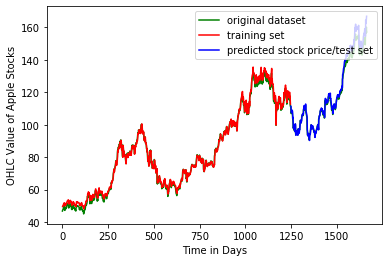

In [26]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()

In [27]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:" + str(np.asscalar(last_val)))
print ("Next Day Value:" + str(np.asscalar(last_val*next_val)))
# print np.append(last_val, next_val)

Last Day Value:166.86526489257812
Next Day Value:176.56105041503906
